<a href="https://colab.research.google.com/github/sftSalman/pytorch/blob/main/new_customData_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader
import os
from torchvision.io import read_image
from skimage import io

In [2]:
class CatsAndDogsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = read_image(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [3]:
dataset = CatsAndDogsDataset(
    csv_file = "/content/drive/MyDrive/Deep Learning/pytorch/Test_data/cats_dogs.csv",
    root_dir="/content/drive/MyDrive/Deep Learning/pytorch/Test_data/cats_dogs_resized",
    #transform=transforms.ToTensor(),
)

In [4]:
in_channel = 3
num_classes = 2
learning_rate = 1e-3
batch_size = 32
num_epochs = 10

In [5]:
train_set, test_set = torch.utils.data.random_split(dataset,[5,5])
train_loader = DataLoader(train_set,batch_size = batch_size,shuffle = True)
#train_loader = DataLoader(dataset,train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set,batch_size=batch_size,shuffle=True)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
#plt.figure(figsize=(4,8))

<Figure size 288x576 with 0 Axes>

<Figure size 288x576 with 0 Axes>

Feature batch shape: torch.Size([5, 3, 224, 224])
Labels batch shape: torch.Size([5])
Label: 0


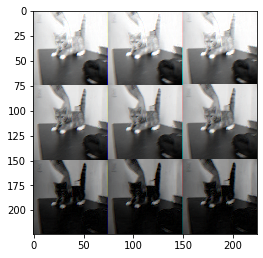

In [22]:
#plt.figure(figsize=(4,200))
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0]
img = img.reshape(img.shape[1],img.shape[2],img.shape[0])
label = train_labels[0]
plt.imshow(img)
#plt.show()
print(f"Label: {label}")